In [1]:
!pip install pymoo pandas numpy matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.7/72.7 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 54.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.5/309.5 kB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 786.8/786.8 kB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 6.3 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pymoo.core.problem import Problem
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize
from pymoo.termination import get_termination

In [17]:
df = pd.read_csv("synthetic_generators.csv")

P_min = df["P_min"].values
P_max = df["P_max"].values
a = df["Cost_a"].values
b = df["Cost_b"].values
c = df["Cost_c"].values
e = df["Emission_coeff"].values

NUM_GENERATORS = len(df)
TOTAL_DEMAND = 20000  # MW - Adjusted to be within the feasible range


In [28]:
# Optimization Problem

class PowerGridOptimization(Problem):
    def __init__(self):
        super().__init__(
            n_var=NUM_GENERATORS,
            n_obj=2,
            n_constr=1,
            xl=P_min,
            xu=P_max
        )

    def _evaluate(self, X, out, *args, **kwargs):
        cost = np.sum(a * X**2 + b * X + c, axis=1)
        emission = np.sum(e * X, axis=1)

        # Allow small tolerance (e.g., ±50 MW)
        tolerance = 50
        power_balance_violation = np.abs(np.sum(X, axis=1) - TOTAL_DEMAND) - tolerance

        out["F"] = np.column_stack([cost, emission])
        out["G"] = power_balance_violation


In [32]:
algorithm = NSGA2(
    pop_size=100,
    eliminate_duplicates=True
)

termination = get_termination("n_gen", 1000)


In [33]:
problem = PowerGridOptimization()

result = minimize(
    problem,
    algorithm,
    termination,
    seed=42,
    verbose=True
)

n_gen  |  n_eval  | n_nds  |     cv_min    |     cv_avg    |      eps      |   indicator  
     1 |      100 |      1 |  2.394359E+04 |  2.584109E+04 |             - |             -
     2 |      200 |      1 |  2.384692E+04 |  2.502284E+04 |             - |             -
     3 |      300 |      1 |  2.268922E+04 |  2.452058E+04 |             - |             -
     4 |      400 |      1 |  2.268527E+04 |  2.413123E+04 |             - |             -
     5 |      500 |      1 |  2.226153E+04 |  2.371304E+04 |             - |             -
     6 |      600 |      1 |  2.204523E+04 |  2.322138E+04 |             - |             -
     7 |      700 |      1 |  2.133570E+04 |  2.271502E+04 |             - |             -
     8 |      800 |      1 |  2.133343E+04 |  2.226754E+04 |             - |             -
     9 |      900 |      1 |  2.102771E+04 |  2.183725E+04 |             - |             -
    10 |     1000 |      1 |  2.036541E+04 |  2.144141E+04 |             - |             -

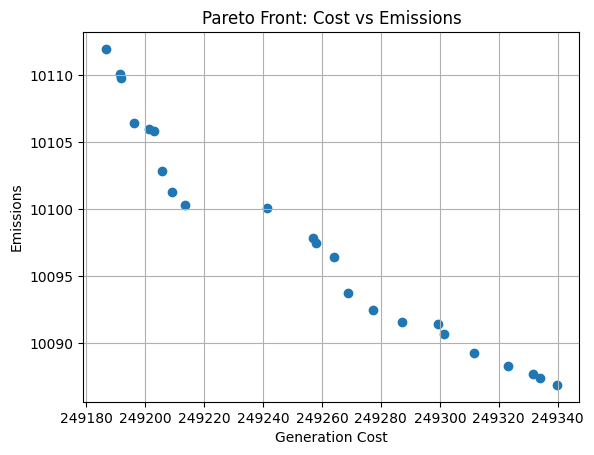

In [34]:
plt.figure()
if result.F is not None:
    plt.scatter(result.F[:, 0], result.F[:, 1])
    plt.xlabel("Generation Cost")
    plt.ylabel("Emissions")
    plt.title("Pareto Front: Cost vs Emissions")
    plt.grid(True)
    plt.show()
else:
    print("No feasible solutions found to plot the Pareto Front.")

In [35]:
if result.X is not None and result.F is not None:
    # Assuming we want to show the first solution on the Pareto front as an example
    # For a multi-objective problem, the 'best' solution depends on the user's preference
    # Here, we just pick the first one from the non-dominated set
    best_solution_index = np.argmin(result.F[:, 0]) # Example: choose solution with minimum cost
    best_solution = result.X[best_solution_index]

    print("Optimal Generator Outputs (MW) for a representative solution:")
    for i, val in enumerate(best_solution):
        print(f"G{i+1}: {val:.2f} MW")

    print(f"\nCost: {result.F[best_solution_index][0]:.2f}")
    print(f"Emissions: {result.F[best_solution_index][1]:.2f}")
else:
    print("No feasible solutions found by the optimization algorithm.")

Optimal Generator Outputs (MW) for a representative solution:
G1: 47.85 MW
G2: 41.02 MW
G3: 40.82 MW
G4: 44.69 MW
G5: 47.21 MW
G6: 49.09 MW
G7: 50.77 MW
G8: 41.08 MW
G9: 45.06 MW
G10: 72.67 MW
G11: 41.74 MW
G12: 65.26 MW
G13: 39.21 MW
G14: 37.29 MW
G15: 25.22 MW
G16: 39.72 MW
G17: 41.01 MW
G18: 31.52 MW
G19: 47.66 MW
G20: 25.54 MW
G21: 20.43 MW
G22: 27.14 MW
G23: 66.41 MW
G24: 48.48 MW
G25: 31.38 MW
G26: 31.09 MW
G27: 24.67 MW
G28: 27.88 MW
G29: 24.05 MW
G30: 29.06 MW
G31: 32.19 MW
G32: 39.75 MW
G33: 49.74 MW
G34: 35.63 MW
G35: 22.28 MW
G36: 42.82 MW
G37: 41.03 MW
G38: 39.16 MW
G39: 35.90 MW
G40: 36.51 MW
G41: 37.50 MW
G42: 48.00 MW
G43: 30.69 MW
G44: 50.53 MW
G45: 38.23 MW
G46: 39.17 MW
G47: 73.88 MW
G48: 38.24 MW
G49: 49.07 MW
G50: 63.07 MW
G51: 42.08 MW
G52: 46.19 MW
G53: 29.35 MW
G54: 45.62 MW
G55: 44.33 MW
G56: 49.67 MW
G57: 42.47 MW
G58: 29.30 MW
G59: 32.49 MW
G60: 42.06 MW
G61: 29.97 MW
G62: 90.37 MW
G63: 46.38 MW
G64: 20.10 MW
G65: 59.34 MW
G66: 21.09 MW
G67: 74.24 MW
G68: 41.0

In [36]:
min_total_generation = np.sum(P_min)
max_total_generation = np.sum(P_max)

print(f"Minimum possible total generation: {min_total_generation} MW")
print(f"Maximum possible total generation: {max_total_generation} MW")
print(f"Total demand: {TOTAL_DEMAND} MW")

if TOTAL_DEMAND >= min_total_generation and TOTAL_DEMAND <= max_total_generation:
    print("The total demand is within the feasible range of generator outputs. The problem should be solvable in principle.")
else:
    print("WARNING: The total demand is OUTSIDE the feasible range of generator outputs. The problem is inherently unsolvable with current generator limits.")

Minimum possible total generation: 17514 MW
Maximum possible total generation: 74155 MW
Total demand: 20000 MW
The total demand is within the feasible range of generator outputs. The problem should be solvable in principle.


In [37]:
print("Total generation:", np.sum(best_solution))
print("Demand:", TOTAL_DEMAND)
print("Difference:", np.sum(best_solution) - TOTAL_DEMAND)


Total generation: 19950.625572205943
Demand: 20000
Difference: -49.37442779405683
